# COMP 3400 Porject Iteration 1
## New York City Housing Preservtion and Development Data Analysis
For this project, we have chosen two data sets containing information about New York City's affordable housing by building and project. The Department of Housing Preservation and Development (HPD) reports on buildings, units, locations, projects, etc. are present in the dataset which started after January 2014 and are an important part of the dataset. Our goal for this project is that we will predict the affordable buildings or suits in New York City through these data sets. We will also determine which project is responsible for affordable and non-affordable houses in New York City based on different towns. And finally, we will be mapping these based on their latitudes and longitudes on New York City’s map which will declare the most affordable place to live in New York City. 

The datasets that we will be using are - 
1.	Affordable Housing Production by Building
https://data.cityofnewyork.us/Housing-Development/Affordable-Housing-Production-by-Building/hg8x-zxpr
2.	Affordable Housing Production by Project
https://data.cityofnewyork.us/Housing-Development/Affordable-Housing-Production-by-Project/hq68-rnsi
In both of these datasets, all the attributes or columns are common except the ‘Program Group’ which is present in the 2nd data set. We will extract that column from the 2nd dataset as well as drop some less important columns from our 1st dataset and will merge these which will create a new data frame for our project. 

The attributes or columns that we will be using - 

- Building ID - This ID is a unique numeric id assigned by HPD to identify each building.
- Project ID - This ID is a unique numeric id assigned by HPD to identify each project.
- Project Name - This is assigned by HPD as each project’s name.
- Program Group - The groups that are responsible for or to support each project.
- Address - This will determine the actual location of a building in New York City.
- Borough - Towns inside New York City. There are 5 boroughs in these datasets.
- Postcode - Postal code of each building.
- Latitude - Will frame the building’s location on the earth’s surface.
- Longitude - Will frame the building’s location on the earth’s surface.
- Project Start Date - The date on which the project was approved by HPD.
- Very Low Income Units - Affordable rents for households earning 0% - 30% of the area median income*.
- Very Low Income Units - Affordable rents for households earning 31% - 50% of the area median income*.
- Low Income Units - Affordable rents for households earning 51% -80% of the area median income*.
- Moderate Income Units - Affordable rents for households earning 81% - 120% of the area median income*.
- Middle Income Units - Affordable rents for households earning 121% - 165% of the area median income*.
- Studio Units - Units with 0 bedrooms.
- 1-BR Units - Units with only 1 bedroom.
- 2-BR Units - Units with two bedrooms.
- 3-BR+ Units - Units with 3 or more bedrooms.
- Counted Rental Units - Total number of units in a building for which assistance has been provided to landlords in exchange for a requirement for affordable units.
- Counted Homeownership Units - Total number of units in a building for which assistance has been provided straight to the homeowners. 

*Latest Area Median Income table for NYC is available at https://www1.nyc.gov/site/hpd/services-and-information/area-median-income.page


These are the attributes or columns we will be using for our project. 

Our intention with the project is to analyze public policy regarding housing in NYC. Hence we kept attributes that can offer insights into economic situation (such as number of units of different income group, or homeownership vs rental). We also wanted to see if such statistics change between the 5 boroughs of NYC - Manhattan, Brooklyn, Bronx, Staten Island and Queens. Each of these boroughs are popular with a certain demographic - Manhattan being the buisiness district and Queens being popular among the working class. We intend to uncover any difference in public policy within these boroughs.

The Project ID and the Building ID will be kept to identify any buildings or projects by their unique ID for this project. The same goes for the Project Name as well. However, we are keeping the Program Group in our project to understand which government program was used to fund the project. Address and Postcode are necessary for location purposes. Hence, it is necessary for our project. We want to keep the ‘Borough’ column in our work as we will be predicting in which borough/town the rent is more affordable. As we are planning on mapping out the location of each building on New York City’s map, latitude and longitude will determine the location of a building on the map. Extremely low-income units to moderate-income units will be present in our project to get an idea about the availability as well as affordability of rents in New York’s different boroughs. Studio Units to 3-BR+ units to are being kept in our data frame for the availability and affordability of units in New York’s different boroughs. Finally, we will keep Counted Rental and Counted Homeownership units to count the total number of rental units as well as the units that are owned by their owners for our future usage in this project.

### Loading Data

In [3850]:
# import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from math import floor


#Change pandas default settings so that all columns are displayed in jupyter notebook
pd.set_option('display.max_columns', None)

# Read Affordable_Housing_Production_by_Building.csv.
# Dataset contains information about buildings which were funded by New York City Housing Preservation and Development.
housing_prod_by_building_df = pd.read_csv("Affordable_Housing_Production_by_Building.csv")
print("Loaded", housing_prod_by_building_df.shape[0], "records")
# Display top 10 record
housing_prod_by_building_df.head(10)

Loaded 5798 records


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,65554,BRIDGE ROCKAWAY,03/31/2022,NaN,1003153.0,805,ROCKAWAY AVENUE,Brooklyn,11212.0,3.036030e+09,NaN,BK-16,42.0,916,BK81,40.660120,-73.908285,40.66005,-73.907972,NaN,New Construction,No,Non Prevailing Wage,122,38,13,0,0,0,85,17,46,25,0,0,0,0,173,0,173,174
1,69099,VOA. 1746 ANDREWS AVENUE SOUTH,03/31/2022,NaN,1002488.0,1746,ANDREWS AVENUE SOUTH,Bronx,10453.0,2.028780e+09,NaN,BX-05,14.0,21501,BX36,40.850370,-73.917222,40.85028,-73.916947,NaN,New Construction,No,Prevailing Wage,117,0,0,0,0,1,93,24,1,0,0,0,0,0,118,0,118,118
2,69567,ASLAND CAPITAL. 1940 TURNBULL AVE. PL SARA,03/31/2022,NaN,1003176.0,1940,TURNBULL AVENUE,Bronx,10473.0,2.036720e+09,NaN,BX-09,18.0,16,BX09,40.822911,-73.857365,40.82262,-73.856777,NaN,New Construction,No,Prevailing Wage,153,0,0,0,0,1,122,31,1,0,0,0,0,0,154,0,154,154
3,72295,CONFIDENTIAL,03/31/2022,03/31/2022,NaN,----,----,Bronx,NaN,NaN,NaN,BX-08,11.0,NaN,NaN,NaN,NaN,NaN,NaN,03/31/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1
4,72179,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-15,46.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
5,72347,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-12,40.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
6,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40677.0,505,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059763.0,MN-09,7.0,22301,MN06,40.818420,-73.953141,40.81864,-73.953119,NaN,Preservation,No,Non Prevailing Wage,0,11,0,8,0,0,0,0,14,5,0,0,0,0,0,19,19,19
7,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40693.0,523,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059754.0,MN-09,7.0,22301,MN06,40.818868,-73.954214,40.81914,-73.954308,NaN,Preservation,No,Non Prevailing Wage,0,17,0,8,0,0,0,1,16,8,0,0,0,0,0,25,25,25
8,67442,505 WEST 134 STREET CLUSTER,03/22/2022,NaN,40696.0,527,WEST 134 STREET,Manhattan,10031.0,1.019880e+09,1059752.0,MN-09,7.0,22301,MN06,40.818895,-73.954272,40.81927,-73.954611,NaN,Preservation,No,Non Prevailing Wage,0,17,0,8,0,0,0,1,16,8,0,0,0,0,0,25,25,25
9,72154,CONFIDENTIAL,03/21/2022,03/21/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-14,40.0,NaN,NaN,NaN,NaN,NaN,NaN,03/21/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1


In [3851]:
# Read Affordable_Housing_Production_by_Building.csv
# Dataset contains information about project which were funded by New York City Housing Preservation and Development.
housing_prod_by_project_df = pd.read_csv("Affordable_Housing_Production_by_Project.csv")

#Drop all columns except Project ID and Program Group and display 10 records
housing_prod_by_project_df.drop(housing_prod_by_project_df.columns.difference(['Project ID','Program Group']), axis=1, inplace=True)
print("Loaded", housing_prod_by_project_df.shape[0], "records")
housing_prod_by_project_df.head(10)

Loaded 3185 records


,Project ID,Program Group
0,65554,Multifamily Finance Program
1,69099,Multifamily Finance Program
2,69567,Multifamily Finance Program
3,72295,Homeowner Assistance Program
4,72179,Homeowner Assistance Program
5,72347,Homeowner Assistance Program
6,67442,Multifamily Finance Program
7,72154,Homeowner Assistance Program
8,72165,Homeowner Assistance Program
9,72156,Homeowner Assistance Program


### Merging data set

In [3852]:
# Merge the two datasets using the common column 'Project ID'.
df = pd.merge(housing_prod_by_building_df, housing_prod_by_project_df, on='Project ID')
print("Dataset contains", df.shape[0], "records")
df.head()

Dataset contains 5798 records


,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,BIN,Community Board,Council District,Census Tract,NTA - Neighborhood Tabulation Area,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Building Completion Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Other Income Units,Studio Units,1-BR Units,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,Program Group
0,65554,BRIDGE ROCKAWAY,03/31/2022,NaN,1003153.0,805,ROCKAWAY AVENUE,Brooklyn,11212.0,3.036030e+09,NaN,BK-16,42.0,916,BK81,40.660120,-73.908285,40.66005,-73.907972,NaN,New Construction,No,Non Prevailing Wage,122,38,13,0,0,0,85,17,46,25,0,0,0,0,173,0,173,174,Multifamily Finance Program
1,69099,VOA. 1746 ANDREWS AVENUE SOUTH,03/31/2022,NaN,1002488.0,1746,ANDREWS AVENUE SOUTH,Bronx,10453.0,2.028780e+09,NaN,BX-05,14.0,21501,BX36,40.850370,-73.917222,40.85028,-73.916947,NaN,New Construction,No,Prevailing Wage,117,0,0,0,0,1,93,24,1,0,0,0,0,0,118,0,118,118,Multifamily Finance Program
2,69567,ASLAND CAPITAL. 1940 TURNBULL AVE. PL SARA,03/31/2022,NaN,1003176.0,1940,TURNBULL AVENUE,Bronx,10473.0,2.036720e+09,NaN,BX-09,18.0,16,BX09,40.822911,-73.857365,40.82262,-73.856777,NaN,New Construction,No,Prevailing Wage,153,0,0,0,0,1,122,31,1,0,0,0,0,0,154,0,154,154,Multifamily Finance Program
3,72295,CONFIDENTIAL,03/31/2022,03/31/2022,NaN,----,----,Bronx,NaN,NaN,NaN,BX-08,11.0,NaN,NaN,NaN,NaN,NaN,NaN,03/31/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,Homeowner Assistance Program
4,72179,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,NaN,BK-15,46.0,NaN,NaN,NaN,NaN,NaN,NaN,03/25/2022,New Construction,No,Non Prevailing Wage,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,Homeowner Assistance Program


### Minor tweaks
We prefer to concatenate 'Number' field and 'Street' field into a single attribute called 'Address'. We also converted 'Project Start Date' into datetime object. Lastly, we noticed that there are very few units with more than 3 bedrooms. Hence we felt it unnecessary to have separate attributes like 3-BR Units, 4-BR Units, 5-BR Units, 6-BR+ Units, and instead chose to club them together into 3-BR+ Units. 


In [3853]:
# Concatenate 'Number' and 'Street' into a single 'Address' column
df["Address"] = df["Number"].astype(str) + " " + df["Street"]

# Type cast string 'Project Start Date' into datetime64 objects
df['Project Start Date'] = df['Project Start Date'].astype('datetime64[ns]')

# Very few buildings contain high number of 3-BR, 4-BR, 5-BR and 6-BR+ units, compared to studio, 1-BR and 2-BR units.
# We are summing all 3-BR, 4-BR, 5-BR and 6-BR+ units attributes into 3-BR+ units
df["3-BR+ Units"] = df["3-BR Units"].astype(int) + df["4-BR Units"].astype(int) + df["5-BR Units"].astype(int) + df["6-BR+ Units"].astype(int)

# Drop columns that are not relevant to our project, or have been converted into a different form, or can be derived from other columns.
# These include 'Number', 'Street', 'Council District', 'Project Completion Date', 'Building Completion Date', 'BBL', 'BIN', 'Community Board', 'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude', 'Longitude', 'Reporting Construction Type', 'Extended Affordability Only', 'Prevailing Wage Status', 'Other Income Units', 'Unknown-BR Units', 'All Counted Units', 'Total Units'
df = df.drop(columns=['Number', 'Street', 'Council District', 'Project Completion Date', 'Building Completion Date', 'BBL', 'BIN', 'Community Board', 'Census Tract', 'NTA - Neighborhood Tabulation Area', 'Latitude', 'Longitude', 'Other Income Units', 'Unknown-BR Units', 'All Counted Units', 'Total Units'], errors='ignore')

# Rename Latitude (Internal) to Latitude, Longitude (Internal) to Longitude
df = df.rename(columns={'Latitude (Internal)': 'Latitude', 'Longitude (Internal)': 'Longitude'})
df = df[['Building ID', 'Project ID', 'Project Name', 'Program Group', 'Address',  'Borough', 'Postcode', 'Latitude', 'Longitude','Project Start Date', 'Reporting Construction Type', 'Extended Affordability Only', 'Prevailing Wage Status', 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units', 'Counted Rental Units', 'Counted Homeownership Units']]



### Removing Confidential records
A unique feature of our dataset is that many records are classified as CONFIDENTIAL by HPD. A record that is CONFIDENTIAL has null values for attributes such as Address, Latitude, Longitude etc. We will be removing these records as many of the information we are interested in are redacted from these records. 

1089 CONFIDENTIAL records were identified and removed, representing 18.79% of total records.

In [3854]:
# Print the number of records which are classified as 'CONFIDENTIAL'
print("Percentage of records with confidential data:", round(df[df['Project Name'] == 'CONFIDENTIAL'].shape[0] / df.shape[0] * 100, 2), "%")

Percentage of records with confidential data: 18.78 %


In [3855]:
# Delete records that are confidential
confidential_records_df = df[df['Project Name'] == 'CONFIDENTIAL']
confidential_records_df.set_index(['Building ID', 'Project ID'], inplace=True)

df = df[df['Project Name'] != 'CONFIDENTIAL']
# Set Building ID as index
df['Building ID'] = df['Building ID'].astype(int)
df.set_index(['Building ID', 'Project ID'], inplace=True)
df.sort_index(inplace=True)
df.head()

,,Project Name,Program Group,Address,Borough,Postcode,Latitude,Longitude,Project Start Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Studio Units,1-BR Units,2-BR Units,3-BR+ Units,Counted Rental Units,Counted Homeownership Units
Building ID,Project ID,,,,,,,,,,,,,,,,,,,,,,
375,48646,SKA MARIN. 1918 FIRST AVE. DRAPER HALL,Multifamily Finance Program,1918 1 AVENUE,Manhattan,10029.0,40.78466,-73.943076,2014-12-24,Preservation,No,Prevailing Wage,202,0,0,0,0,2,200,1,0,203,0
382,68660,RIVER CROSSING OWNER HDFC.HPO.FY20,Multifamily Finance Program,1952 1 AVENUE,Manhattan,10029.0,40.78587,-73.941933,2019-10-23,Preservation,Yes,Non Prevailing Wage,0,0,3,177,22,8,61,86,47,202,0
413,61875,1199 HOUSING CORP.PLP.FY19,Multifamily Finance Program,2070 1 AVENUE,Manhattan,10029.0,40.79088,-73.937682,2019-06-28,Preservation,No,Non Prevailing Wage,74,352,0,0,0,39,155,150,82,0,426
452,66805,TRIPLE HDFC.HPO.FY19,Multifamily Finance Program,2232 1 AVENUE,Manhattan,10029.0,40.79498,-73.935750,2018-09-27,Preservation,No,Non Prevailing Wage,0,0,8,0,0,0,0,8,0,8,0
482,71849,2269 1ST AVENUE APARTMENTS,Multifamily Incentives Program,340 EAST 117 STREET,Manhattan,10035.0,40.79665,-73.935441,2021-10-26,New Construction,No,Non Prevailing Wage,0,0,0,0,27,7,16,4,0,27,0


### Handling columns with null values
We have very few records that have missing values, mostly geographical information. In a later stage, we will look into the possibility of using Google Geocoding API to obtain these values from the building's address. At this stage of iteration 1, we chose to drop records with null values.

177 such records were identified, and removed.

Total number of removed records: 1089 + 177 = 1266 (21.8% of all records)

In [3856]:
# Display the number of rows which has a null value for each column
df.isna().sum()

/Users/tejusrevi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Project Name                     0
Program Group                    0
Address                          0
Borough                          0
Postcode                        67
Latitude                       164
Longitude                      164
Project Start Date               0
Reporting Construction Type      0
Extended Affordability Only      0
Prevailing Wage Status           0
Extremely Low Income Units       0
Very Low Income Units            0
Low Income Units                 0
Moderate Income Units            0
Middle Income Units              0
Studio Units                     0
1-BR Units                       0
2-BR Units                       0
3-BR+ Units                      0
Counted Rental Units             0
Counted Homeownership Units      0
dtype: int64

In [3857]:
# Drop records with null value in Latitude, Longitude and Postcode
# From the documentation for the dataset, these columns likely have null values because Geocoding API couldn't figure out Latitude, Longitude and Postcode for the address.
null_records_df = df[df.isna().any(axis=1)].copy()

df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]
df = df[df['Postcode'].notna()]

# Display the number of rows which has a null value for each column.
df.isna().sum()

Project Name                   0
Program Group                  0
Address                        0
Borough                        0
Postcode                       0
Latitude                       0
Longitude                      0
Project Start Date             0
Reporting Construction Type    0
Extended Affordability Only    0
Prevailing Wage Status         0
Extremely Low Income Units     0
Very Low Income Units          0
Low Income Units               0
Moderate Income Units          0
Middle Income Units            0
Studio Units                   0
1-BR Units                     0
2-BR Units                     0
3-BR+ Units                    0
Counted Rental Units           0
Counted Homeownership Units    0
dtype: int64

In [3858]:
print("Cleaned data contains", df.shape[0], "rows and", df.shape[1], "columns")

Cleaned data contains 4532 rows and 22 columns


### Descriptor Statistics

In [3859]:
df[['Latitude', 'Longitude', 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units', 'Counted Rental Units', 'Counted Homeownership Units']].describe()

,Latitude,Longitude,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Studio Units,1-BR Units,2-BR Units,3-BR+ Units,Counted Rental Units,Counted Homeownership Units
count,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000
mean,40.743496,-73.919558,6.875331,13.050309,15.035746,2.454987,4.311121,6.029126,14.930715,14.490953,5.855031,30.729700,11.185349
std,0.079545,0.053657,24.573531,39.493842,35.270435,14.563962,21.296912,20.306818,29.035607,28.432361,14.881447,56.689173,50.952781
min,40.573710,-74.170235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.676617,-73.950733,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,40.720755,-73.927726,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,9.000000,0.000000
75%,40.819500,-73.892991,1.000000,6.000000,12.000000,0.000000,1.000000,2.000000,14.000000,13.000000,5.000000,30.000000,0.000000
max,40.905210,-73.729709,429.000000,396.000000,536.000000,358.000000,448.000000,415.000000,241.000000,305.000000,230.000000,542.000000,489.000000


In [3860]:
def plotHistogram(df, axs, columns):
    for i in range(0, len(columns)):
        axs[i].hist(df[columns[i]], density=True, bins=20)
        df[columns[i]].plot.density(ax=axs[i], title=columns[i])
        axs[i].set_title(columns[i]);

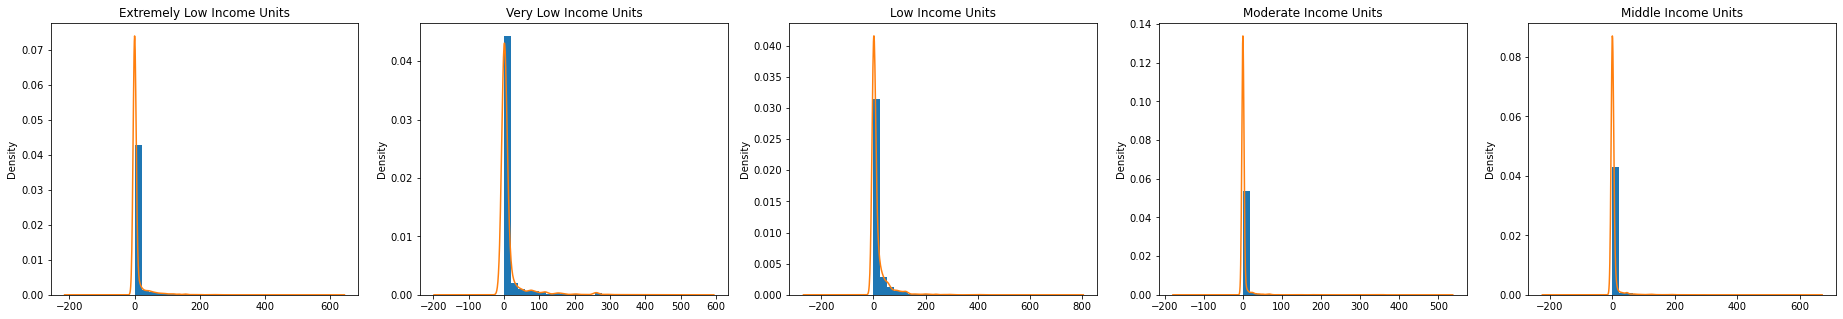

In [3861]:
fig, axs = plt.subplots(1, 5, figsize=(32, 5))

income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units']
# Generate histogram plot for number of units in each income class
plotHistogram(df, axs, income_groups)


From the histograms, it can be inferred that the data for number of units allocated to different income groups is highly skewed to the left. 

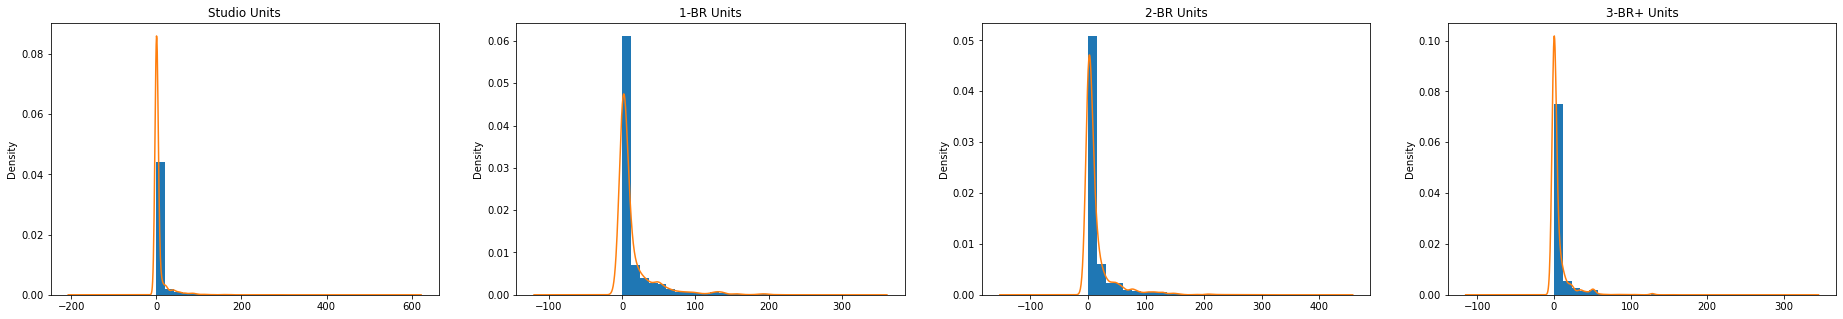

In [3862]:
fig, axs = plt.subplots(1, 4, figsize=(32, 5))

bedroom_units=['Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units']
# Generate histogram plot for number of units, by the number of bedrooms in that unit 
plotHistogram(df, axs, bedroom_units)

From the histograms, it can be inferred that the data for number of units by the number of bedrooms is highly skewed to the left.

## Plotting

#### Stacked bar plot to illustrate number of units allocated to different income groups in each of NYC's 5 Boroughs
We decided to plot the number of housing units allocated to each income group ('Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units'), grouped by the borough in which the units are located. We chose these attributes since it will offer insights into the income demographics in each of NYC's 5 boroughs. We also felt it was necessary to plot the same information, but with each income group unit represented as a ratio of all units in that borough. We did so because different boroughs have different number of units. By comparing percentages, we were able hedge out statistics against a common scale to see how housing units in NYC boroughs are allocated to different income groups.

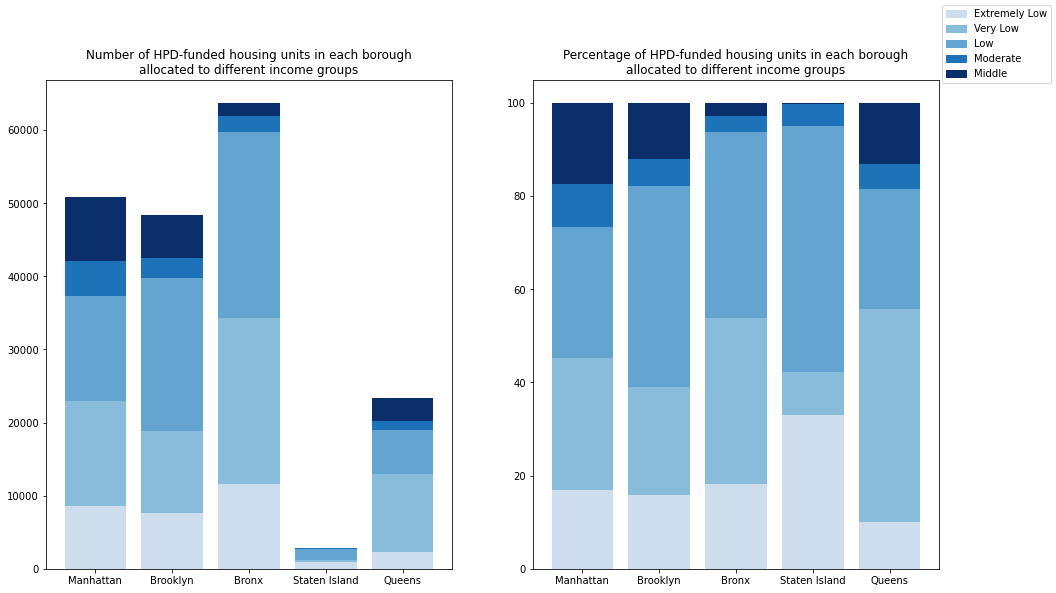

In [3863]:
# Plotting bar charts to illustrate the distribution of units belonging to different income groups in each NYC borough (in absoluet numbers and as ratio)

# array with all possible boroughs
boroughs = ['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens']
# array with all possible income group
income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units']

# Generating a 2D array, where columns are boroughs, and rows are sum of number of units. eg. Row(0,0) will contain number of Extremely Low Income Units in Manhattan
income_groups_absolute = []
# Loop through all income groups
for income_group in income_groups: 
    temp = []
    # Loop through all boroughs
    for borough in boroughs:
        # Perform a sum of all units that are of selected income group in seleted borough
        temp.append(df[df['Borough'] == borough][income_group].sum())
    income_groups_absolute.append(temp)


total_num_units_per_borough = [0, 0, 0, 0, 0]
for income_group in income_groups_absolute:
    for i in range(0, len(income_group)):
        total_num_units_per_borough[i] += income_group[i]

# Generating a 2D array, where columns are boroughs, and rows are ratio of a particular income group unit as a proportion of whole. 
# eg. Row(0,0) will contain ratio of Extremely Low Income Units in Manhattan as a ratio of all units in Manhattan
income_groups_ratio = []
# Loop through range(0, 1, 2.. len(income_group))
for i in range(0, len(income_group)):
    temp = []
    # Loop through range(0, 1, 2.. len(total_num_units_per_borough))
    for j in range(0, len(total_num_units_per_borough)):
        # Perform a division of the number of units of selected income group in selected borough by total number of units in that borough * 100
        temp.append(income_groups_absolute[i][j]/total_num_units_per_borough[j]*100)
    income_groups_ratio.append(temp)


fig, axs = plt.subplots(1, 2, figsize=(16, 9))
axs=axs.flatten() 

colors = {'Extremely Low':'#cddded', 'Very Low': '#89bcdb', 'Low': '#63a4d1', 'Moderate': '#1d72b8', 'Middle': '#0a2f6b'} # Dictionary to assign hex color to different income group

# Function to plot absolute number of units in each borough by income group
def plot_num_units_per_borough_per_income_group(axs):
    bottom = [0, 0, 0, 0, 0] # Array to track height of previous bars
    for i in range(0, len(income_groups_absolute)):
        axs.bar(boroughs, income_groups_absolute[i], bottom=bottom, color=[x for x in colors.values()][i])
        for j in range(0, len(income_groups_absolute[i])):
            bottom[j]+=income_groups_absolute[i][j]
    axs.set_title('Number of HPD-funded housing units in each borough\nallocated to different income groups')

# Function to plot ratio of units in each borough by income group
def plot_ratio_units_per_borough_per_income_group(axs):
    bottom = [0, 0, 0, 0, 0] # Array to track height of previous bars
    for i in range(0, len(income_groups_absolute)):
        axs.bar(boroughs, income_groups_ratio[i], bottom=bottom, color=[x for x in colors.values()][i])
        for j in range(0, len(income_groups_absolute[i])):
            bottom[j]+=income_groups_ratio[i][j]
    axs.set_title('Percentage of HPD-funded housing units in each borough\nallocated to different income groups')

plot_num_units_per_borough_per_income_group(axs[0])
plot_ratio_units_per_borough_per_income_group(axs[1])

# Creating labels
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig.legend(handles, labels)

#### Line Chart to illustrate number of units allocated to different income groups by year
We also wanted to see how public policy and construction of new housing units have changed with time. We decided to use 'Project Start date' instead of 'Project Completion Date' since the latter has many null values (for projects that are currently in construction). We decided to just use the year in which the project was approved to get a higher level insight into the number of hosuing units that were built for each income group.

*The data for 2022 only includes the first 4 month of the year 

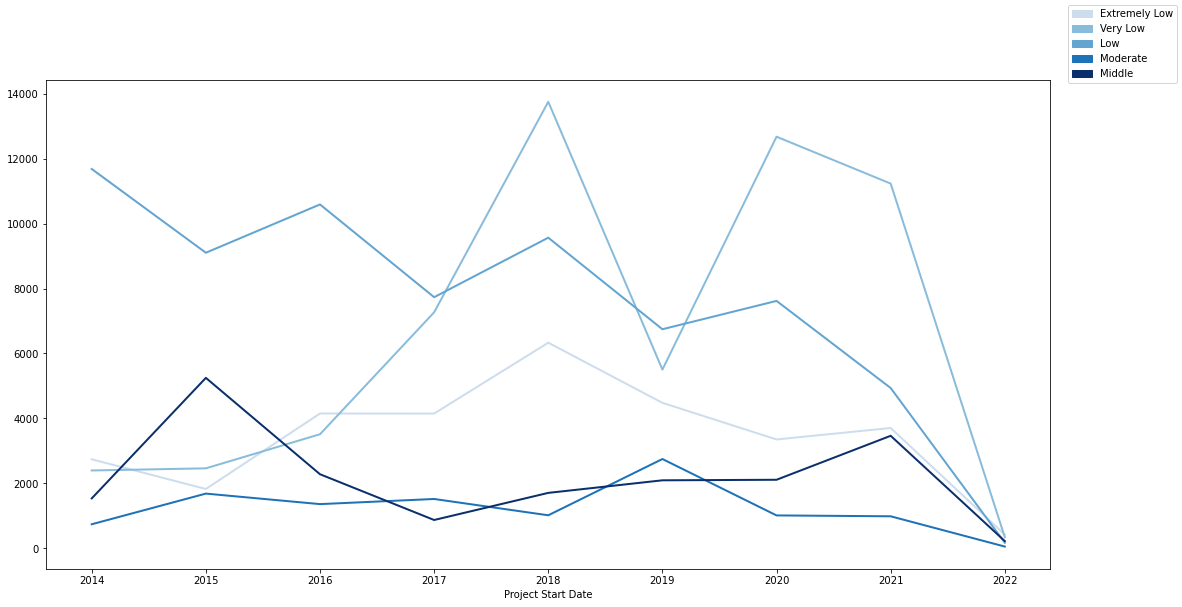

In [3864]:
# Plotting the number of new units of different income groups in each year, from 2014 to 2022
fig, axs = plt.subplots(1,1,figsize=(18,9))


income_groups=['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units'] # array with all possible income group
colors = {'Extremely Low':'#cddded', 'Very Low': '#89bcdb', 'Low': '#63a4d1', 'Moderate': '#1d72b8', 'Middle': '#0a2f6b'} # Dictionary to assign hex color to different income group

# Function to plot number of units of each income group per year
def plot_num_unit_per_income_group_per_year():
    # Loop from (0, 1, .. len(income_groups)) to select an income group
    for i in range(0, len(income_groups)):
        # Group data by the year obtained from 'Project Start Date', and then perform sum of units of selected income group in that year
        data = df.groupby(df['Project Start Date'].map(lambda x: x.year), )[income_groups[i]].sum()
        data.plot(ax=axs, lw=2, color=[x for x in colors.values()][i])

# Plot legend
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig.legend(handles, labels)

plot_num_unit_per_income_group_per_year()
    

### Outlier Detection and resolution

We defined an outlier as any datapoint that was 6 standard deviations above the mean of the series (or below 0, even though we did not have any such record). After repeated trial and error using different outlier detection techniques, we found this technique the best. The reason we went with 6 standard deviation was because our datapoints for 'Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units' were highly skewed to the left. This was mainly because buildings that have a certain type of unit tends to have a lot of such unit. Eg. if a building contains studio and 1 bedroom units, it will likely contain many studio and 1-BR units, and none of the rest (akin to real world where building floor plans are designed for just one or two types of units). Similary, buildings indtended for extremely low income groups will likely not contain any units intended for middle income units.

We went with the number 6 based the number of records that were reported as outliers. by using 5 standard deviations, we ideentified 5% of records as outliers.

Outliers were replaced with upper bound (ie, mean + 6*sd)

In [3865]:
# Function to plot two line charts to illustrate change in data 
def plot_series_side_by_side(original, modified, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    axs = axs.flatten()
    i = 0
    for c in columns:
        # Plot original data series
        axs[i].plot([i[0] for i in df.index], original[c], label="original", color='black')
        # Plot updated data series
        axs[i].plot([i[0] for i in df.index], modified[c], label="modified", color='red')
        # Set title as the selected column
        axs[i].set_title(c)
        axs[i].legend()
        i+=1

Fixed 225 records 5.0 % of records


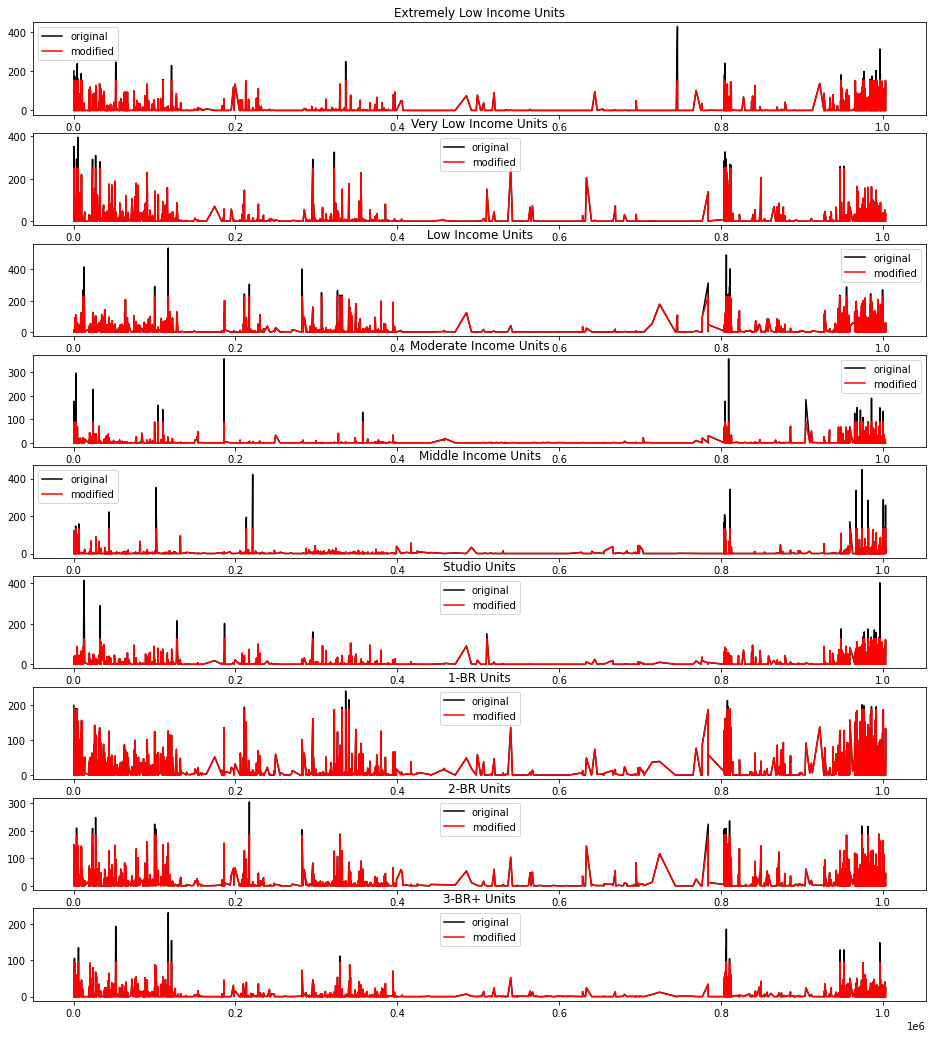

In [3866]:

# All numerical columns, that could possibly have outliers
numeric_cols = ['Extremely Low Income Units', 'Very Low Income Units', 'Low Income Units', 'Moderate Income Units', 'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units', '3-BR+ Units']

def replace_outliers_6times_std(df, cols):
    '''
    Function to find outliers (an oputlier is a datapoint that is 3 standard deviations or more away from mean)
    and then replace those values by the maximum or minimum permissible value
    :param df: dataframe to replace outliers, cols: columns with outliers
    '''
    count_fixed = 0 # variable to count number of fixed records
    outliers = {}
    for col in cols:
        upper_bound = df[col].mean() + 6*df[col].std()
        lower_bound = 0
        count_fixed += df[df[col] >= upper_bound][col].count()
        outliers[col] = df[df[col] >= upper_bound].drop(columns=['Project Name', 'Address'], errors='ignore')
        df[col] = np.where(df[col] >= upper_bound, floor(upper_bound), np.where(df[col] <= lower_bound, floor(lower_bound), df[col]))
    print("Fixed", count_fixed, "records", round(count_fixed/df.shape[0]*100, 0), "% of records")
    return df, outliers
        
df_before = df.copy()
df, outliers = replace_outliers_6times_std(df, numeric_cols)

plot_series_side_by_side(df_before, df, numeric_cols)

# PART 2 -  Data scaling pre-assessment

First step in data scaling pre assessment is to remove columns that will not be used in our evaluations. We chose to remove **Project Name** and **Address** from our dataframes as these nominal values does not often repeat (ie, they have unique values in almost all columns).

In [3867]:
# Drop columns Project Name and Address
df = df.drop(columns=['Project Name', 'Address'], errors='ignore')
confidential_records_df = confidential_records_df.drop(columns=['Project Name', 'Address'], errors='ignore')
null_records_df = null_records_df.drop(columns=['Project Name', 'Address'], errors='ignore')

### Encoding Attributes

At this step, we will be encoding all nominal attributes. The encoding strategies we chose are explained below.

* **Project Start Date** - This attributes contains YYYY-MM-DD of the start date of the project. We felt it will be much more useful to just extract year from the **Project Start Date** as the year will be a repeating value. We then performed ordinal encoding on year.
* **Reporting Construction Type** - We performed binary label encoding on Reporting Construction Type such that {'Preservation': 0, 'New Construction': 1}
* **Extended Affordability Only** - We performed binary label encoding on Extended Affordability Only such that {'No': 0, 'Yes': 1}
* **Prevailing Wage Status** - We performed binary label encoding on Prevailing Wage Status such that {'Non Prevailing Wage': 0, 'Prevailing Wage': 1}
* **Postcode** - We performed frequency encoding on Postcode. We did so because we believe that housing projects tend to cluster in certain neighborhoods. Hence, we wanted our model to emphasize the frequency at which a pincode appears on the dataset.
* **Neighborhood** - This attribute was obtained by binning together related pincodes (discussed later in the notebook). We performed frequency encoding on Neighborhoods for the same reason as Pincode.
* **Program Group** - We performed OHE encoding on Program Group. This significantly improved the predictive power of our model. Since, there is only 4 possible values in Program Group, the dimensionality of our dataset is not heavily affected.
* **Borough** - We performed OHE encoding on Borough. This significantly improved the predictive power of our model. Since, there is only 5 possible values in Borough, the dimensionality of our dataset is not heavily affected.

In [3868]:
from sklearn.preprocessing import OneHotEncoder 

def encodeDataframe(df, referenceDf=None):
    '''
    Function to encode nominal attributes in the given datafram
    :params df: dataframe to encode, referenceDf: training dataframe that contains all possible values for every attribute
    '''
    # Project Start Date ordinal encoding
    df = df.copy()
    df['Project Start Date'] = pd.DatetimeIndex(df['Project Start Date']).year
    df = df.replace({2014:0, 2015:1, 2016:2, 2017:3, 2018:4, 2019:5, 2020:6, 2021:7, 2022:8})

    # Reporting Construction Type (binary label encoding)
    df = df.replace({'Preservation': 0, 'New Construction': 1})

    # Ext. affordability only (binary label encoding)
    df = df.replace({'No': 0, 'Yes': 1})

    # Prevailing wage (binary label encoding)
    df = df.replace({'Non Prevailing Wage': 0, 'Prevailing Wage': 1})

    # If our dataset has the attribute Postcode, then perform frequency encoding on it
    if 'Postcode' in df:
        if not df['Postcode'].isnull().values.any():
            postcode_nom_1 = (df.groupby('Postcode').size()) / len(df)
            df['Postcode'] = df['Postcode'].apply(lambda x : postcode_nom_1[x])
    
    # If our dataset has the attribute Neighborhood, then perform frequency encoding on it
    if 'Neighborhood' in df:
        if not df['Neighborhood'].isnull().values.any():
            postcode_nom_1 = (df.groupby('Neighborhood').size()) / len(df)
            df['Neighborhood'] = df['Neighborhood'].apply(lambda x : postcode_nom_1[x])
    
    # Program Group OHE encoding
    ohe = OneHotEncoder()
    df_ohe = df.copy()
    role = df_ohe['Program Group'].values
    df_ohe = pd.DataFrame(ohe.fit_transform(role.reshape(-1,1)).toarray(), index=df.index)
    df_ohe.columns = [i[3:] for i in ohe.get_feature_names_out()]
    df = pd.merge(df, df_ohe, on=['Building ID', 'Project ID'])

    # If the dataset happens to not conatin all possible values for Program Group, then add these values as an attribute with 0 in all records
    # For example, a smaller split of our dataset was found to not contain any Buildings with 'Homeowner Assistance Program' as a Program Group.
    # Hence the encoded version of this split contained one few column that other splits. We use a referenceDf (ie, training dataset) to add all possible attributes to the encoded dataset.
    if referenceDf is not None:
        programGroups = referenceDf['Program Group'].unique()
        for programGroup in programGroups:
            if programGroup not in df.columns:
                df[programGroup] = 0

    # Borough OHE encoding
    df_ohe = df.copy()
    role = df_ohe['Borough'].values
    df_ohe = pd.DataFrame(ohe.fit_transform(role.reshape(-1,1)).toarray(), index=df.index)
    df_ohe.columns = [i[3:] for i in ohe.get_feature_names_out()]
    df = pd.merge(df, df_ohe, on=['Building ID', 'Project ID'])

    # If the dataset happens to not conatin all possible values for Boropugh, then add these values as an attribute with 0 in all records
    if referenceDf is not None:
        boroughs = referenceDf['Borough'].unique()
        for borough in boroughs:
            if borough not in df.columns:
                df[borough] = 0
    
    # Remove OHE encoded original columns
    df = df.drop(columns = ['Program Group', 'Borough'], errors='ignore')
    return df

In [3869]:
# Encode all dataframes
encoded_df = encodeDataframe(df)
encoded_confidential_records_df = encodeDataframe(confidential_records_df, df)
encoded_null_records_df = encodeDataframe(null_records_df, df)

In [3870]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

def plot_hist_density_scalers(ndf, col, title_, scalers, scaler_names):
    '''
    Function to plot the effect of scalers on each attribute of the dataset
    :param ndf: dataframe to plot the effects of scaling, col: columns to plot the effects of scaling, scalers: array of scaler functions, scaler_names: array of scaler string names
    '''
    fig, axs = plt.subplots(len(col),len(scalers)+1,figsize=(20,46),constrained_layout=True)
    fig.suptitle(title_, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in col:
        ndf[c].hist(ax=axs[i], density=True) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            ndf_transformed = scalers[j].fit_transform(ndf)
            ndf_transformed = pd.DataFrame(ndf_transformed, index=ndf.index, columns=ndf.columns)
            ndf_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            ndf_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1

# List of scaler names
scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile', 'Z-score']
# List of scaler functions
scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'), Normalizer()]

#plot_hist_density_scalers(encoded_df, encoded_df.columns, 'Scalers effect', scalers, scaler_names)

# PART 3 – Handling missing data and outliers

## 3.1 handling missing data

Our original dataframe contained 5798 records. Out of this, 1089 records were removed because they had confidential information and 177 records were removed because they had null values for one or more attributes in {Postcode, Latitude, Longitude}. 

Having removed these records, we were left with 4532 records in the original dataset. In this step, we will attempt to predict the redacted information in confidential_records_df and the null values in null_records_df

### Confidential Records
Any information that can be used to uniquely identify a building was redacted from confidential_records_df. This included attributes like Building ID, Project Name, Postcode, Latitude, Longitude etc. The attributes that are of interest to us are Postcode, Latitude, Longitude. All 1089 records in confidential_records_df have missing values for Postcode, Latitude, Longitude.

### Null Records
177 records were identified because they contained null values for Postcode, latitude and longitude. Unlike confidential records, not all 177 conatined missing values for all 3 attributes. 
Among 177 records in encoded_null_records_df, 
* 54 records have missing values for postcode, latitude and longitude.
* 13 records have missing values for postcode, but have valid latitude and longitude.
* 110 records have missing latitude and longitude, but have valid Postcode.



In [3871]:
print('Null records and their count in encoded_confidential_records_df')
print(encoded_confidential_records_df.isna().sum()[encoded_confidential_records_df.isna().sum() != 0])
print('\nNull records and their count in encoded_null_records_df')
print(encoded_null_records_df.isna().sum()[encoded_null_records_df.isna().sum() != 0])

Null records and their count in encoded_confidential_records_df
Postcode     1089
Latitude     1089
Longitude    1089
dtype: int64

Null records and their count in encoded_null_records_df
Postcode      67
Latitude     164
Longitude    164
dtype: int64


### Baseline Strategy

Our baseline strategy for Latitude and Longitude is to use mean value from the main dataframe. We used mean as it is the best agreed upon measure of geogrphical centrality.
For postcode, we are using the mode value in main dataframe since it is a nominal; attribute.

Since Latitude, Longitude and Postcode are all geographical information, we are grouping our dataframe by the known georgraphical information we have - Borough. We will then calculate the baseline measure for each borough. Since there are 5 possible boroughs, we will have 5 possible baseline measure for each attributes

In [3877]:
def baseline_strategy(df, referenceDf):
    '''
    Function to replace missing values with value obtained from a primitive strategy
    :params df: dataframe to replace missing values, referenceDf: dataframe to calculate baseline values from
    '''
    # Arrays to hold baseline values
    new_rows_postcode = []
    new_rows_neighborhood = []
    new_rows_latitude = []
    new_rows_longitude = []
    df = df.copy()
    # for each borough
    for borough in referenceDf['Borough'].unique():
        print("here")
        print("here")
        # Use mode within the borough as baseline strategy for postcode
        if 'Postcode' in df:
            print("heeere")
            mode_postcode_within_borough = referenceDf[referenceDf['Borough'] == borough]['Postcode'].mode().iloc[0]
            print(df['Borough'] == borough)
            new_rows_postcode.append(df[df['Borough'] == borough]['Postcode'].fillna(mode_postcode_within_borough))
        # Use mode within the borough as baseline strategy for neighborhood
        if 'Neighborhood' in df:
            mode_neighborhood_within_borough = referenceDf[referenceDf['Borough'] == borough]['Neighborhood'].mode().iloc[0]
            new_rows_postcode.append(df[df['Borough'] == borough]['Neighborhood'].fillna(mode_neighborhood_within_borough))
        # Use centroid (ie, mean) within the borough as baseline strategy for latitude and longitude
        mean_latitude_within_borough = referenceDf[referenceDf['Borough'] == borough]['Latitude'].mean()
        mean_longitude_within_borough = referenceDf[referenceDf['Borough'] == borough]['Longitude'].mean()

        # Replace null values with newly calculated baseline values
        new_rows_latitude.append(df[df[borough] != 0]['Latitude'].fillna(mean_latitude_within_borough))
        new_rows_longitude.append(df[df[borough] != 0]['Longitude'].fillna(mean_longitude_within_borough))
    if 'Postcode' in df:
        df['Postcode'] = pd.concat(new_rows_postcode)
    if 'Neighborhood' in df:
        df['Neighborhood'] = pd.concat(new_rows_neighborhood)
    df['Latitude'] = pd.concat(new_rows_latitude)
    df['Longitude'] = pd.concat(new_rows_longitude)

    return df


In [3878]:
encoded_confidential_records_df_b = baseline_strategy(confidential_records_df, df)
encoded_null_records_df_b = baseline_strategy(null_records_df, df)

here
here
here
here
here


ValueError: No objects to concatenate

In [3833]:
# import necessary resources
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

def find_best_learning_strategy(df, attr_to_predict, scaling_strategies, models, evaluation_criteria, lower_is_better=True):
    '''
    Function to find best combination of model + learning strategy for the given dataset and attribute
    :params df: training dataset, attr_to_predict: the attribute that needs to be predicted, scaling_strategies: an array with [<name>, <function>] of scaling strategies, models: an array with [<name>, <function>] of models, evaluation_criteria: criteria to evaluate model, lower_is_better: is lower evaluation_criteria score better
    :return tuple containing (best model, best scaler)
    '''
    # Dictionary to store results from first model
    df = df.copy()
    results = {}
    # Iterate through models
    fig, ax = plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
    for i in range(len(models)):
        model = models[i][1]
        results_for_model = {}
        # Iterate through scalers
        for j in range(len(scaling_strategies)):
            # Separate X and y. Transform X as per the scaling method
            X = df.drop([attr_to_predict], axis=1).to_numpy()
            # apply scaling technique
            X_t = scaling_strategies[j][1].fit_transform(X)
            y = df[attr_to_predict].to_numpy()
            cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X_t, y, scoring=evaluation_criteria, cv=cv, n_jobs=-1)
            results_for_model[scaling_strategies[j][0]] = [abs(elem) for elem in scores]
        cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring=evaluation_criteria, cv=cv, n_jobs=-1)
        results_for_model['Raw data'] = [abs(elem) for elem in scores]

        ax[i].boxplot(results_for_model.values())
        ax[i].set_xticklabels(results_for_model.keys())
        ax[i].set_title(models[i][0] + "(" + attr_to_predict + ")")
        ax[i].set_ylabel(evaluation_criteria)
        results[models[i][0]] = results_for_model
    
    mean_scores = []
    for i in range(len(models)):
        for j in range(len(scaling_strategies)):
            mean_score = round(sum(results[models[i][0]][scaling_strategies[j][0]]) / 6, 4)
            mean_scores.append([models[i][1], scaling_strategies[j][1], mean_score])
    
    best_strategy = mean_scores[0]
    c = mean_scores[0][2]
    for i in mean_scores:
        if lower_is_better:
            if c > i[2]:
                c = i[2]
                best_strategy = i
        else:
            if c < i[2]:
                c = i[2]
                best_strategy = i
    print("The best learning strategy for %s is %s model with %s scaling technique, which yields avg %s=%0.4f" %(attr_to_predict, best_strategy[0], best_strategy[1], evaluation_criteria, best_strategy[2]))
    return best_strategy[:-1]


In [3834]:
arr_scalers = [['MinMax', MinMaxScaler()], ['Z-score', Normalizer()], ['MaxAbs', MaxAbsScaler()], ['Robust', RobustScaler()], ['Quantile', QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]]

classification_models = [['KNN Classifier', KNeighborsClassifier(n_neighbors=3)], ['Linear Classifier', LogisticRegression(max_iter=6000)]]

regression_models = [['KNN Regressor', KNeighborsRegressor(n_neighbors=3)], ['Linear Regressor', LinearRegression()]]

In [3835]:
# find best learning strategy for Latitude
#find_best_learning_strategy(encoded_df, 'Latitude', arr_scalers, regression_models, 'neg_root_mean_squared_error');

In [3836]:
# find best learning strategy for Longitude
#find_best_learning_strategy(encoded_df, 'Longitude', arr_scalers, regression_models, 'neg_root_mean_squared_error');

In [3837]:
from sklearn import preprocessing

# To find the best learning strategy for postcode, replace frequency encoded value of postcode with label encoded value
encoded_postcodes = encoded_df['Postcode']
encoded_df['Postcode'] = df['Postcode']

le = preprocessing.LabelEncoder()
le.fit(encoded_df['Postcode'])
encoded_df['Postcode'] = le.transform(encoded_df['Postcode'])

# find best learning strategy for Postcode
#find_best_learning_strategy(encoded_df, 'Postcode', arr_scalers, classification_models, 'f1_weighted', lower_is_better=False);

### Improving f1-score of postcode through binning

The weighted-f1 score from predicting Postcode was ~ 0.5-0.55. To improve upoon this weak f1 score, we chose to bin nearby pincodes into neigborhoods. Since pincodes did not follow a natural numerical ordering, we had to source the information on what pincodes belong to what neighborhood. [This website](https://bklyndesigns.com/new-york-city-zip-code/) provided information on postcodes grouped by NYC neighborhoods.

Even though a neghborhood encompasses a much larger area than a postcode, it still gives valueable information about the location of a housing project within a borough.

![img](img1.JPG)

In [3838]:
nyc_neigborhoods = {"Inwood and Washington Heights": [10031, 10032, 10033, 10034, 10040],
"Central Harlem": [10026, 10027, 10030, 10037, 10039],
"East Harlem": [10029, 10035],
"Upper West Side": [10023, 10024, 10025, 10069],
"Upper East Side": [10021, 10028, 10044, 10065, 10075, 10128],
"Chelsea and Clinton": [10001, 10011, 10018, 10019, 10020, 10036],
"Gramercy Park and Murray Hill": [10010, 10016, 10017, 10022, 10158],
"Greenwich Village and Soho": [10012, 10013, 10014],
"Union Square and Lower East Side": [10002, 10003, 10009],
"Lower Manhattan": [10004, 10005, 10006, 10007, 10038, 10280],

"Port Richmond": [10302, 10303, 10310],
"South Beach and Tottenville":  [10306, 10307, 10308, 10309, 10312],
"Stapleton and St. George":  [10301, 10304, 10305],
"Mid-Island (Willowbrook)": [10314],

"Kingsbridge and Riverdale": [10463, 10471],
"Northeast Bronx": [10466, 10469, 10470, 10475],
"Crotona and Tremont": [10453, 10457, 10460],
"Bronx Park and Fordham": [10458, 10467, 10468],
"Pelham and Throgs Neck": [10461, 10462, 10464, 10465, 10472, 10473],
"HighBridge and Morrisania": [10451, 10452, 10456],
"Hunts Point and Mott Haven": [10454, 10455, 10459, 10474],

"Long Island City and Astoria": [11101, 11102, 11103, 11104, 11105, 11106],
"West Queens": [11368, 11369, 11370, 11372, 11373, 11377, 11378],
"North Queens": [11354, 11355, 11356, 11357, 11358, 11359, 11360],
"Northeast Queens": [11361, 11362, 11363, 11364],
"West Central Queens": [11374, 11375, 11379, 11385],
"Central Queens": [11365, 11366, 11367],
"Southwest Queens": [11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421],
"Jamaica": [11412, 11423, 11432, 11433, 11434, 11435, 11436],
"Southeast Queens": [11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429],
"Rockaways": [11691, 11692, 11693, 11694, 11695, 11697],

"Greenpoint": [11211, 11222, 11249],
"Northwest Brooklyn": [11201, 11205, 11215, 11217, 11231],
"Central Brooklyn (Bedford Stuyvesant – Crown Heights)": [11212, 11213, 11216, 11233, 11238],
"East New York and New Lots": [11207, 11208],
"Sunset Park": [11220, 11232],
"Southwest Brooklyn": [11209, 11214, 11228],
"Borough Park": [11204, 11218, 11219, 11230],
"Canarsie and Flatlands": [11234, 11236, 11239],
"Southern Brooklyn": [11223, 11224, 11229, 11235],
"Flatbush": [11203, 11210, 11225, 11226],
"Bushwick and Williamsburg": [11206, 11221, 11237]
}

#source: https://bklyndesigns.com/new-york-city-zip-code/

In [3839]:
# Find negihborhood by finding which bin does the pincode belong to
df['Neighborhood'] = ''
encoded_confidential_records_df['Neighborhood'] = ''
encoded_null_records_df['Neighborhood'] = ''
for i in nyc_neigborhoods.keys():
    df.loc[df['Postcode'].isin(nyc_neigborhoods[i]), 'Neighborhood'] = i
    confidential_records_df.loc[confidential_records_df['Postcode'].isin(nyc_neigborhoods[i]), 'Neighborhood'] = i
    null_records_df.loc[null_records_df['Postcode'].isin(nyc_neigborhoods[i]), 'Neighborhood'] = i

# Drop postcode from dataframes
df = df.drop(columns=['Postcode'], errors='ignore')
confidential_records_df = confidential_records_df.drop(columns=['Postcode'], errors='ignore')
null_records_df = null_records_df.drop(columns=['Postcode'], errors='ignore')

In [3840]:
# Encode again
encoded_df = encodeDataframe(df)
encoded_confidential_records_df = encodeDataframe(confidential_records_df, df)
encoded_null_records_df = encodeDataframe(null_records_df, df)

In [3844]:
confidential_records_df.head(2)

Program Group   Borough  Latitude  \
Building ID Project ID                                                     
NaN         72295       Homeowner Assistance Program     Bronx       NaN   
            72179       Homeowner Assistance Program  Brooklyn       NaN   

                        Longitude Project Start Date  \
Building ID Project ID                                 
NaN         72295             NaN         2022-03-31   
            72179             NaN         2022-03-25   

                       Reporting Construction Type  \
Building ID Project ID                               
NaN         72295                 New Construction   
            72179                 New Construction   

                       Extended Affordability Only Prevailing Wage Status  \
Building ID Project ID                                                      
NaN         72295                               No    Non Prevailing Wage   
            72179                               No    Non Prevailing Wage   

                        Extremely Low Income Units  Very Low Income Units  \
Building ID Project ID                                                      
NaN         72295                                0                      0   
            72179                                0                      0   

                        Low Income Units  Moderate Income Units  \
Building ID Project ID                                            
NaN         72295                      1                      0   
            72179                      1                      0   

                        Middle Income Units  Studio Units  1-BR Units  \
Building ID Project ID                                                  
NaN         72295                         0             0           0   
            72179                         0             0           0   

                        2-BR Units  3-BR+ Units  Counted Rental Units  \
Building ID Project ID                                                  
NaN         72295                1            0                     0   
            72179                0            1                     0   

                        Counted Homeownership Units Neighborhood  
Building ID Project ID                                            
NaN         72295                                 1          NaN  
            72179                                 1          NaN

In [3845]:
encoded_confidential_records_df.head(2)

Latitude  Longitude  Project Start Date  \
Building ID Project ID                                            
NaN         72295            NaN        NaN                   8   
            72179            NaN        NaN                   8   

                        Reporting Construction Type  \
Building ID Project ID                                
NaN         72295                                 1   
            72179                                 1   

                        Extended Affordability Only  Prevailing Wage Status  \
Building ID Project ID                                                        
NaN         72295                                 0                       0   
            72179                                 0                       0   

                        Extremely Low Income Units  Very Low Income Units  \
Building ID Project ID                                                      
NaN         72295                                0                      0   
            72179                                0                      0   

                        Low Income Units  Moderate Income Units  \
Building ID Project ID                                            
NaN         72295                      1                      0   
            72179                      1                      0   

                        Middle Income Units  Studio Units  1-BR Units  \
Building ID Project ID                                                  
NaN         72295                         0             0           0   
            72179                         0             0           0   

                        2-BR Units  3-BR+ Units  Counted Rental Units  \
Building ID Project ID                                                  
NaN         72295                1            0                     0   
            72179                0            1                     0   

                        Counted Homeownership Units  Neighborhood  \
Building ID Project ID                                              
NaN         72295                                 1           NaN   
            72179                                 1           NaN   

                        Homeowner Assistance Program  \
Building ID Project ID                                 
NaN         72295                                1.0   
            72179                                1.0   

                        Multifamily Finance Program  \
Building ID Project ID                                
NaN         72295                               0.0   
            72179                               0.0   

                        Multifamily Incentives Program  Small Homes Program  \
Building ID Project ID                                                        
NaN         72295                                    0                    0   
            72179                                    0                    0   

                        Bronx  Brooklyn  Manhattan  Queens  Staten Island  
Building ID Project ID                                                     
NaN         72295         1.0       0.0        0.0     0.0            0.0  
            72179         0.0       1.0        0.0     0.0            0.0

In [3842]:
# Find baseline strategy again
confidential_records_df_b = baseline_strategy(confidential_records_df, df)
null_records_df_b = baseline_strategy(null_records_df, df)

ValueError: No objects to concatenate

In [3781]:
encoded_confidential_records_df_b.head(10)

Latitude  Longitude  Project Start Date  \
Building ID Project ID                                             
NaN         72295       40.845259 -73.889040                   8   
            72179       40.673208 -73.934370                   8   
            72347       40.673208 -73.934370                   8   
            72154       40.673208 -73.934370                   8   
            72165       40.673208 -73.934370                   8   
            72156       40.845259 -73.889040                   8   
            72157       40.787388 -73.957721                   8   
            72158       40.707202 -73.822824                   8   
            72166       40.627447 -74.095267                   8   
            72095       40.673208 -73.934370                   8   

                        Reporting Construction Type  \
Building ID Project ID                                
NaN         72295                                 1   
            72179                                 1   
            72347                                 1   
            72154                                 1   
            72165                                 1   
            72156                                 1   
            72157                                 1   
            72158                                 1   
            72166                                 1   
            72095                                 1   

                        Extended Affordability Only  Prevailing Wage Status  \
Building ID Project ID                                                        
NaN         72295                                 0                       0   
            72179                                 0                       0   
            72347                                 0                       0   
            72154                                 0                       0   
            72165                                 0                       0   
            72156                                 0                       0   
            72157                                 0                       0   
            72158                                 0                       0   
            72166                                 0                       0   
            72095                                 0                       0   

                        Extremely Low Income Units  Very Low Income Units  \
Building ID Project ID                                                      
NaN         72295                                0                      0   
            72179                                0                      0   
            72347                                0                      0   
            72154                                0                      0   
            72165                                0                      0   
            72156                                0                      0   
            72157                                0                      0   
            72158                                0                      0   
            72166                                0                      0   
            72095                                0                      0   

                        Low Income Units  Moderate Income Units  \
Building ID Project ID                                            
NaN         72295                      1                      0   
            72179                      1                      0   
            72347                      1                      0   
            72154                      1                      0   
            72165                      1                      0   
            72156                      1                      0   
            72157                      1                      0   
            72158                      1                      0   
   

In [3720]:
encoded_null_records_df_b.head(10)

,,Latitude,Longitude,Project Start Date,Reporting Construction Type,Extended Affordability Only,Prevailing Wage Status,Extremely Low Income Units,Very Low Income Units,Low Income Units,Moderate Income Units,Middle Income Units,Studio Units,1-BR Units,2-BR Units,3-BR+ Units,Counted Rental Units,Counted Homeownership Units,Neighborhood,Homeowner Assistance Program,Multifamily Finance Program,Multifamily Incentives Program,Small Homes Program,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Building ID,Project ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
59775,70542,40.822003,-73.889457,3,0,0,0,0,0,138,0,0,118,20,1,0,139,0,0.028249,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
73807,67398,40.852920,-73.900068,5,0,1,0,10,3,31,0,0,1,33,5,6,45,0,0.028249,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89017,61849,40.853800,-73.901130,3,0,0,0,0,0,454,2,0,0,144,273,39,456,0,0.045198,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97290,69877,40.875010,-73.828362,6,0,0,0,0,118,194,0,0,48,96,120,48,0,312,0.073446,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109464,69877,40.875010,-73.828362,6,0,0,0,0,59,253,0,0,48,97,120,48,0,313,0.073446,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
122133,69140,40.826767,-73.909471,7,0,0,0,25,0,24,0,0,0,39,7,4,50,0,0.028249,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
288856,68432,40.679157,-73.938091,5,0,0,0,0,25,7,0,0,1,0,24,7,32,0,0.090395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
288857,68432,40.672107,-73.895354,5,0,0,0,0,46,248,0,0,32,115,97,50,294,0,0.090395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
326090,68432,40.672107,-73.895354,5,0,0,0,2,42,250,0,0,32,115,97,50,294,0,0.090395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


The best learning strategy for Neighborhood is LogisticRegression(max_iter=6000) model with QuantileTransformer(n_quantiles=10, output_distribution='normal',
                    random_state=0) scaling technique, which yields avg f1_weighted=0.7622


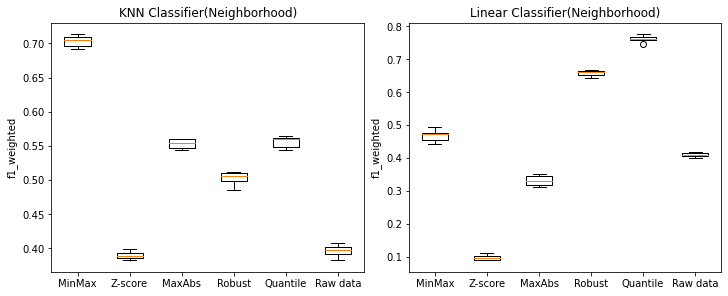

In [3722]:

# Save frequency encoded values for neihborhoods. These will be used later while predicting latitude and longitude
freq_encoded_neighborhoods = encoded_df['Neighborhood']
encoded_df['Neighborhood'] = df['Neighborhood']

# Perform label encoding on Neighborhood
le = preprocessing.LabelEncoder()
le.fit(encoded_df['Neighborhood'])
encoded_df['Neighborhood'] = le.transform(encoded_df['Neighborhood'])
df['Neighborhood'] = le.transform(df['Neighborhood'])

label_encoded_neighborhoods = encoded_df['Neighborhood']

# Find best learning strategy for neighborhood
find_best_learning_strategy(encoded_df, 'Neighborhood', arr_scalers, classification_models, 'f1_weighted', lower_is_better=False);

In [3723]:
def predict(train_df, to_predict_df, model, scaling_technique, X_attrs, y_attr):
    '''
    Function to predict attribute values
    :params: train_df: training dataset, to_predict_df: dataframe to predict values, model: model to use in prediction, scaling_technique: scaler to use in prediction, X_attrs: list of input parameters, y_attr: target parameter
    :return: predicted values as np array
    '''
    X = train_df[X_attrs].to_numpy()

    # Fir data per quantile scaler
    X_t = scaling_technique.fit_transform(X)

    y = df[y_attr].to_numpy()

    # Fit data into the model
    model.fit(X_t, y)

    to_predict_df = to_predict_df[X_attrs]

    to_predict_df_t = scaling_technique.fit_transform(to_predict_df)
    return model.predict(to_predict_df_t)


In [3724]:
all_attrs = ['Neighborhood', 'Latitude', 'Longitude', 'Project Start Date',
       'Reporting Construction Type', 'Extended Affordability Only',
       'Prevailing Wage Status', 'Extremely Low Income Units',
       'Very Low Income Units', 'Low Income Units', 'Moderate Income Units',
       'Middle Income Units', 'Studio Units', '1-BR Units', '2-BR Units',
       '3-BR+ Units', 'Counted Rental Units', 'Counted Homeownership Units',
       'Homeowner Assistance Program', 'Multifamily Finance Program',
       'Multifamily Incentives Program', 'Small Homes Program', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [3725]:
encoded_df['Neigborhood'] = freq_encoded_neighborhoods

In [3726]:
x_attrs = [i for i in all_attrs if i not in ['Longitude', 'Neighborhood', 'Latitude']]
latitude_pred = predict(encoded_df, encoded_confidential_records_df, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Latitude')

x_attrs = [i for i in all_attrs if i not in ['Longitude', 'Neighborhood', 'Latitude']]
longitude_pred = predict(encoded_df, encoded_confidential_records_df, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Longitude')

x_attrs = [i for i in all_attrs if i not in ['Longitude', 'Neighborhood', 'Latitude']]

encoded_df['Neighborhood'] = label_encoded_neighborhoods
neighborhood_pred = predict(encoded_df, encoded_confidential_records_df, LogisticRegression(max_iter=6000), QuantileTransformer(n_quantiles=10, output_distribution='normal',
                    random_state=0), x_attrs, 'Neighborhood')

confidential_records_df['Latitude'] = latitude_pred
confidential_records_df['Longitude'] = longitude_pred
confidential_records_df['Neighborhood'] = neighborhood_pred

In [3730]:
missing_neighborhood = null_records_df[null_records_df['Neighborhood'].isna()]
missing_lat_long = null_records_df[null_records_df['Latitude'].isna()]

In [3731]:
missing_lat_long_only = missing_lat_long[missing_lat_long['Neighborhood'].notna()]
missing_neighborhood_only = missing_neighborhood[missing_neighborhood['Latitude'].notna()]
missing_lat_long_neighborhood = null_records_df.loc[(null_records_df['Neighborhood'].isna()) & (null_records_df['Latitude'].isna())]

In [3732]:
encoded_missing_lat_long_only = encodeDataframe(missing_lat_long_only, df)
encoded_missing_neighborhood_only = encodeDataframe(missing_neighborhood_only, df)
encoded_missing_lat_long_neighborhood = encodeDataframe(missing_lat_long_neighborhood, df)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [3693]:
encoded_df['Neighborhood'] = freq_encoded_neighborhoods

x_attrs = [i for i in all_attrs if i not in ['Latitude', 'Longitude']]
latitude_pred = predict(encoded_df, encoded_missing_lat_long_only, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Latitude')

x_attrs = [i for i in all_attrs if i not in ['Latitude', 'Longitude']]
longitude_pred = predict(encoded_df, encoded_missing_lat_long_only, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Longitude')

encoded_missing_lat_long_only['Latitude'] = latitude_pred
encoded_missing_lat_long_only['Longitude'] = longitude_pred
encoded_missing_lat_long_only['Neighborhood'] = le.transform(missing_lat_long_only['Neighborhood'])

x_attrs = [i for i in all_attrs if i not in ['Neighborhood']]
encoded_df['Neighborhood'] = label_encoded_neighborhoods
neighborhood_pred = predict(encoded_df, encoded_missing_neighborhood_only, LogisticRegression(max_iter=6000), QuantileTransformer(n_quantiles=10, output_distribution='normal',
                    random_state=0), x_attrs, 'Neighborhood')


encoded_missing_neighborhood_only['Neighborhood'] = neighborhood_pred

encoded_df['Neighborhood'] = freq_encoded_neighborhoods
x_attrs = [i for i in all_attrs if i not in ['Latitude', 'Longitude', 'Neighborhood']]
latitude_pred = predict(encoded_df, encoded_missing_lat_long_neighborhood, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Latitude')

x_attrs = [i for i in all_attrs if i not in ['Latitude', 'Longitude', 'Neighborhood']]
longitude_pred = predict(encoded_df, encoded_missing_lat_long_neighborhood, KNeighborsRegressor(n_neighbors=3), MinMaxScaler(), x_attrs, 'Longitude')

x_attrs = [i for i in all_attrs if i not in ['Latitude', 'Longitude', 'Neighborhood']]
encoded_df['Neighborhood'] = label_encoded_neighborhoods
neighborhood_pred = predict(encoded_df, encoded_missing_lat_long_neighborhood, LogisticRegression(max_iter=6000), QuantileTransformer(n_quantiles=10, output_distribution='normal',
                    random_state=0), x_attrs, 'Neighborhood')

encoded_missing_lat_long_neighborhood['Latitude'] = latitude_pred
encoded_missing_lat_long_neighborhood['Longitude'] = longitude_pred
encoded_missing_lat_long_neighborhood['Neighborhood'] = neighborhood_pred



In [3702]:
encoded_null_records_df = pd.concat([encoded_missing_lat_long_only, encoded_missing_neighborhood_only, encoded_missing_lat_long_neighborhood])

null_records_df['Latitude'] = encoded_null_records_df['Latitude']
null_records_df['Longitude'] = encoded_null_records_df['Longitude']
null_records_df['Neighborhood'] = encoded_null_records_df['Neighborhood']

In [3708]:
for i in outliers.keys():
    outliers[i]['Neighborhood'] = ''
    for j in nyc_neigborhoods.keys():
        outliers[i].loc[outliers[i]['Postcode'].isin(nyc_neigborhoods[j]), 'Neighborhood'] = j
    outliers[i] = outliers[i].drop(columns=['Postcode'], errors='ignopre')
    X = encoded_df.drop([i], axis=1).to_numpy()
    y = encoded_df[i].to_numpy()
    model, scaler = find_best_learning_strategy(encoded_df, i, arr_scalers, regression_models, 'neg_root_mean_squared_error')
    
    to_pred = encodeDataframe(outliers[i], df)
    x_attrs = [j for j in all_attrs if j not in [i]]
    y_pred = predict(encoded_df, to_pred,model, scaler, x_attrs, i)

    y_pred.astype(int)

    to_pred[i] = y_pred.round()

    df.loc[to_pred.index,i] = to_pred

KeyError: 'Postcode'

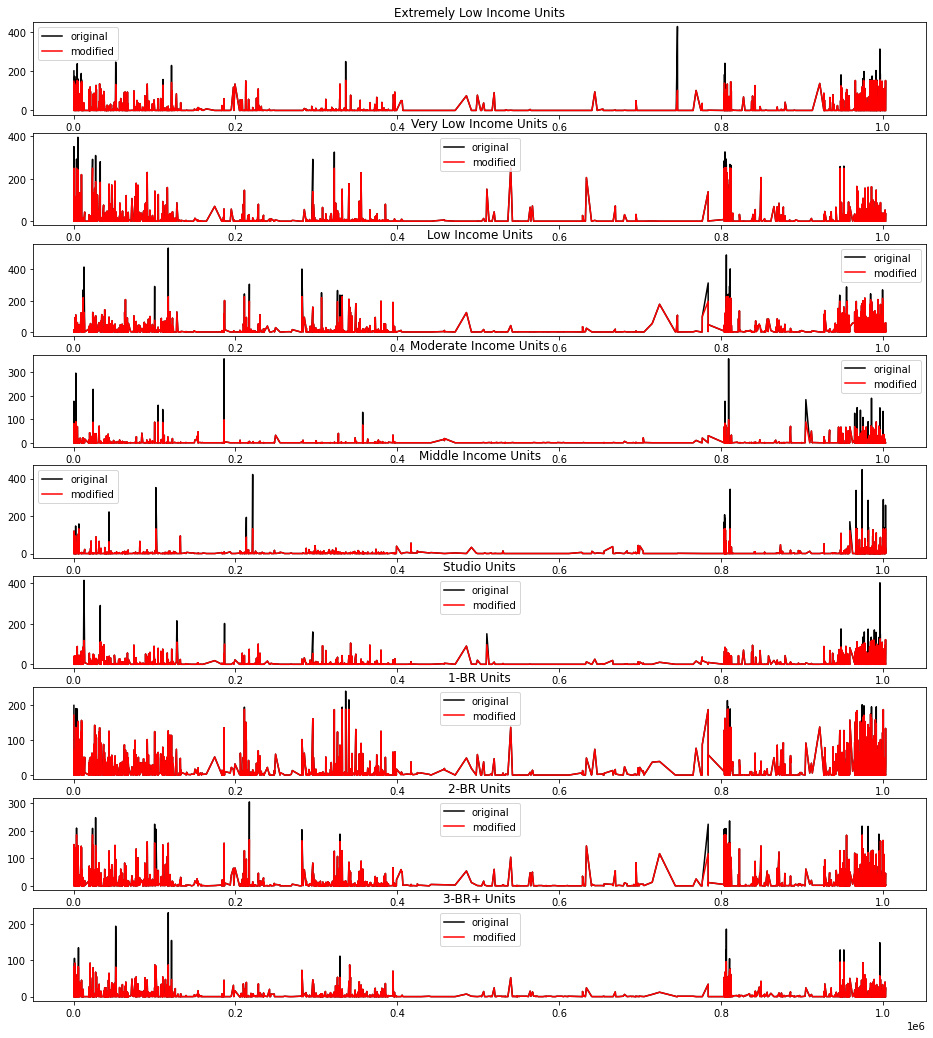

In [3711]:
plot_series_side_by_side(df_before, df, numeric_cols)